# Worshop 1 - Image manipulation and visualization

_Author: Nicola Romanò - [nicola.romano@ed.ac.uk](mailto:nicola.romano@ed.ac.uk)_

## Introduction

This first workshop will allow you to practice what you learned in Lectures 1 and 2, related to basic image manipulation and visualization.

All workshops in the course are in the form of Jupyter notebooks, so that you can easily write, test and modify the code as you read through the document.

In this practical we are going to apply some of the knowledge from the lectures about preprocessing.


## Learning objectives

At the end of this workshop you should be able to:
- Open and visualize images using Python and colourmap them
- Crop images
- Apply affine transformations to images
- Save modified images
- Visualize videos/3D stacks/multidimensional images

## Images as matrices

In lecture 1 we learnt how we can use matrices (or tensors, that is multi-dimensional matrices) to represent an image.

We also introduced the [Numpy library](https://numpy.org/) as a great way to deal with matrix manipulations.
In this first exercise we will use numpy to create a few images.

Let's start by using the `zeros` function from `numpy` to create a 100x100 matrix of zeros. We specify a uint8 (unsigned integer, 8 bit) data type, so that our values are interpreted as 8 bit integers, between 0 and 255. If we did not specify that, numpy would consider our data as real numbers (float).

In [2]:
import _____
img = np.zeros(shape = ____, dtype=np.uint8)

We can now visualize the image we just created using the `imshow` function from `matplotlib`.

Use what you learnt in the lectures to visualize the image using Matplotlib

In [1]:
# Your code to visualize img here

If all is correct, you should see a 100x100 dark purple square.

**Why is it not black?**


<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    What colourmap is `imshow` using by default? Check out the documentation!
    Now change the colourmap to "gray" and see what happens!
</details>


In [2]:
# Your code here - visualize img with the "gray" colourmap

OK, so we've got a pretty boring, black image. Let's change the central pixels to a value of 255 (for example a 20x20 square of pixels).

Then, display the image again.

Note that, when plotting an image, should you want to remove the axes you can use 
`plt.axis("off")`, try it now!


In [4]:
img[_____] = 255

# Show the image here

### Exercise 1

Using a similar approach, generate and display the following image, going from a value of 0 at the top to a value of 100 at the bottom, in steps of 10.

<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    Using a for loop and the range function will make this very easy! 
</details>

![](exercise1.png)

In [ ]:
# Your code for Exercise 1 here

Once we have an image inside a matrix we can easily save it to file using the `imsave` function (from `skimage.io`).
Try saving the image you just created to the "stripes.png" file.

<hr />

*Important note*: the `imread` and `imsave` functions are available both in `matplotlib.pyplot` and in `skimage.io`. While they share the same syntax, they are not quite equivalent.

The differences are especially annoying when it comes to reading and saving images. In general, for scientific images I would recommend using the Scikit Image functions, as their behaviour makes more sense, especially for microscopy images. In any case, always check that the shape of the images you are saving/loading is what you expect them to be! 

In [7]:
import skimage.io as io
io.imsave(____)

You can now try and read the image back into a new variable, display and (visually) check that the whole process actually worked!

In [ ]:
# Your code here

### Exercise 2 - *Some fun with colourmapping.*

Create a figure with a 3x3 grid of plots showing your image with nine different colourmaps. You might want to note how different colourmaps give different impressions of the image.

Look at the [Matplotlib page on colourmaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see a list of the available colourmaps.

<details>
    <summary style="cursor: pointer;">Here are a few hints to get you going!</summary>
    <ul>
    <li>Use the `subplots` function to create a grid of plots</li>
    <li>Note that subplots will return the axes as a 3x3 matrix, so you will have to access them as <code>ax[0,0]</code>, <code>ax[0,1]</code> and so on</li>
    <li>A better way to do this is to put the names of the colourmaps in an array, then use a loop (e.g. with <code>enumerate</code>) to traverse the axes.
    Note that, in order to do that, you will need to <em>flatten</em> the axes matrix using <code>ax.ravel()</code>, for example <code>for i,a in enumerate(ax.ravel()):</code></li>
    </ul>  
</details>

In [ ]:
fig, ax = plt.subplots(______)

# Plot the image with 9 different colourmaps

plt.show()

## Cropping images

We will now practice cropping some images.

Start by loading the nucleoli.png image and display it. This is an immunofluorescence showing nucleoli of HEp-20-10 human epitelial cells (Simon Caulton - CC BY-SA 3.0).

**What are the image dimensions?**

In [ ]:
# Read image
nucleoli = _____ 
# Show image
________
# Get image dimensions
________

Crop the image to only display the two nuclei on the bottom right corner (it might take a bit of trial and error to get the correct coordinates...)

In [ ]:
nucleoli_cropped = ______

plt.imshow(nucleoli_cropped, cmap="gray")
plt.show()

Now, load the langat.jpg image, which contains a confocal image of cells infected with Langat virus (National Institute of Allergy and Infectious Diseases (NIAID) CC-BY-2.0).

**Examine the shape of the image, what does that tell you?**

(1613, 1613, 3)


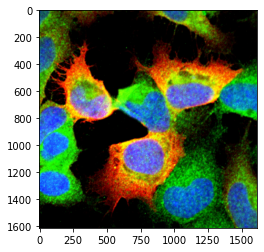

In [20]:
# Your code here
# Load the image, find its shape and display it!

Create a 1x3 visualization of the three colour channels in the image.

<details>
    <summary style="cursor: pointer;">Click for a hint.</summary>
    In this case we have a three-dimensional matrix. This is really a case of "cropping" the image in each colour channel, and displaying each channel using `imshow`.
</details>

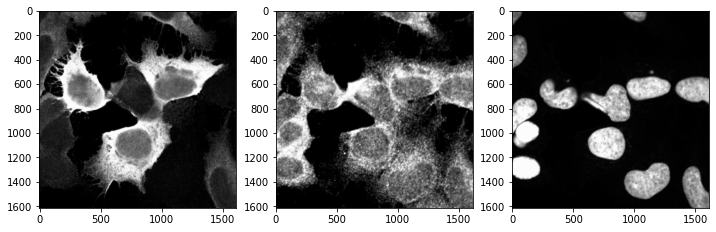

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

# Display each channel in one axis

Now, crop the image so to only visualize channel 2 of a single cell of your choice

In [ ]:
langat_cropped = ___

plt.imshow(langat_cropped, cmap = "gray")
plt.show()

### Exercise 3 - 3D images

The pituitary_stack.tif image contains a 3D confocal stack of a pituitary slice (Nicola Romanò - CC-BY-SA 3.0)

Load the image, look at its shape and visualize every 3rd slice


In [ ]:
pit = _____ # Read image

print(pit.shape)

# Display every 3rd slice in a panel

A different way of showing 3D images is that of creating a new image, where each pixels has the maximum intensity of all pixels at that position in the stack.

This is called a **maximum intensity projection** or MIP.

The `max` function in Numpy makes it supereasy to create MIPs. You can use the `axis` parameter to project along different axes.

Try it below and compare to the images above.

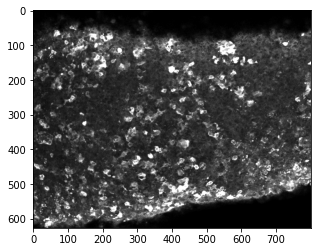

In [112]:
plt.imshow(np.max(pit, axis=0),cmap="gray")
plt.show()

Now create a MIP for the XZ and YZ planes.
Because of the large number of cells, these projections will probably be difficult to understand. Performing them on crops of the original image might help.

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (12,6))

# Create MIPs in XZ and YZ
ax[0].imshow(_____, cmap="gray")
ax[1].imshow(_____, cmap="gray")
plt.show()

There are more advanced ways of displaying 3D images. One that you might want to explore is Napari. This is a fast, interactive, multi-dimensional image viewer for Python. It’s designed for browsing, annotating, and analyzing large multi-dimensional images.

[The Napari website](https://napari.org/tutorials/) has lots of interesting tutorials, which you can explore in your own time, if you are interested in 3D visualizations.

## Affine transformations

In lecture 2, we talked about affine transformations and how they can be used to manipulate images.

Given the nucleoli image from above, try to scale it using the `rescale` function from `skimage` to:

1. 1/10 of its resolution
2. twice in x and three times in y

Display the results.

In [ ]:
from skimage.transform import rescale

plt.imshow(nucleoli, "gray")
plt.show()

# Rescale to 1/10 and display
________
plt.show()
# Rescale 2 times in x and 3 in y, then display
________
plt.show()


Visually compare the results of different orders of interpolation when downscaling to twice the resolution (it might be difficult to see an appreciable difference, unless you "zoom in" on a detail of the image, by displaying a crop).

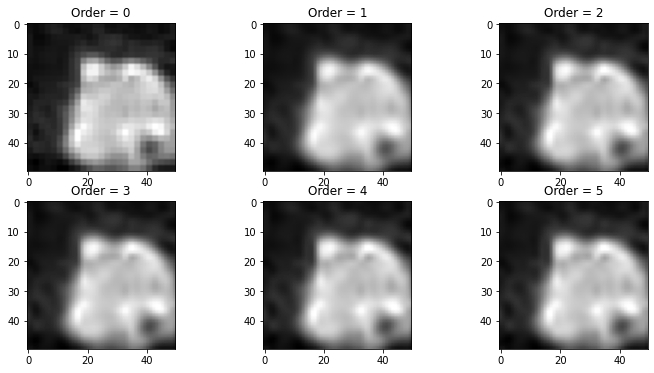

In [64]:
fig, ax = plt.subplots(2, 3, figsize=(12,6))

for i, a in enumerate(ax.ravel()):
    nucleoli_big = # rescale image here, with interpolation order i
    a.imshow(nucleoli_big[300:350, 750:800], cmap="gray")
    a.set_title(f"Order = {i}")

plt.show()

Reload your stripes.png picture and use the skimage `rotate` function to rotate it by 30, 45 or 90 degrees.

In [ ]:
from skimage.transform import rotate

# Display the stripes image rotated 0, 30, 45, or 90 degrees

We learned in the lecture that the `rotate` function performs matrix multiplication to rotate the points. 

**Can you think of another way of rotating the image by 90 degrees?**

In [ ]:
# Your code here

Similarly to what you have done above, see what the effect of different types of interpolation is on the results of a 30 degrees rotation using `rotate` (set the `order` parameter as you did above).

You can crop the image to see the effect more in detail

In [ ]:
# Display a 30 degrees rotation with different orders of interpolation

Finally, let's try building our own transformation matrix.

- Use `SimilarityTransform` to create a matrix that rotates an image by 20 degrees and translates it 10 pixels to the left and 10 to the bottom
- Note that `SimilarityTransform` expects the angle to be in radians. You can convert degrees into radians using `np.deg2rad(angle)`
- Use what you learnt in the lectures to predict what the value of such matrix would be. Check it by printing the matrix.
- Apply the matrix to the stripes image using the `warp` function.


In [ ]:
from skimage.transform import SimilarityTransform, warp

matrix = _____

print(matrix)

stripes_transformed = ______
plt.imshow(stripes_transformed, cmap="gray")
plt.show()

### You made it to the end! Well done!